In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("housing.csv")

In [9]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
data['total_rooms']=np.log(data['total_rooms']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)
data['population']=np.log(data['population']+1)
data['households']=np.log(data['households']+1)

In [14]:
data.ocean_proximity.value_counts()
# One Hot Encoding
data=data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [15]:
#feature engineering: bedroom ratio, rooms in a household, population in a household
data['bedroom_ratio']=data['total_bedrooms']/data['total_rooms']
data['household_rooms']=data['total_rooms']/data['households']
data['household_population']=data['population']/data['households']

In [16]:
data['bedroom_ratio']=np.log(data['bedroom_ratio']+1)
data['household_rooms']=np.log(data['household_rooms']+1)
data['household_population']=np.log(data['household_population']+1)

In [17]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
train_data=x_train.join(y_train)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population,median_house_value
7665,-118.07,33.93,5.0,6.810142,5.236442,7.282074,5.068904,4.1250,True,False,False,False,False,0.570368,0.851651,0.890611,171900.0
9962,-122.23,38.33,31.0,8.143517,6.354370,7.338888,6.287859,5.5368,False,False,False,True,False,0.576781,0.830784,0.773414,325900.0
7372,-118.23,33.97,44.0,7.918992,6.573680,7.993958,6.556778,2.6951,True,False,False,False,False,0.604379,0.791977,0.797142,169300.0
6388,-118.03,34.16,36.0,7.245655,5.389072,6.504288,5.420535,7.1615,False,True,False,False,False,0.556047,0.848742,0.788428,484700.0
16141,-122.46,37.78,52.0,8.035603,6.590301,7.400621,6.496775,2.8553,False,False,False,True,False,0.598912,0.805073,0.760396,360700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,-122.21,37.82,52.0,7.773174,5.811141,6.701960,5.860786,7.0549,False,False,False,True,False,0.558237,0.844280,0.762452,331400.0
14047,-117.13,32.76,29.0,7.851272,6.526495,7.083388,6.466145,2.1094,False,False,False,False,True,0.605007,0.794897,0.739772,162500.0
14827,-117.09,32.66,37.0,7.117206,5.802118,6.991177,5.802118,1.6389,False,False,False,False,True,0.596209,0.800501,0.790698,114300.0
5012,-118.33,34.01,44.0,7.474772,6.139885,6.668228,6.100319,1.9231,True,False,False,False,False,0.599613,0.799896,0.738644,188500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'bedroom_ratio'}>],
       [<Axes: title={'center': 'household_rooms'}>,
        <Axes: title={'center': 'household_population'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

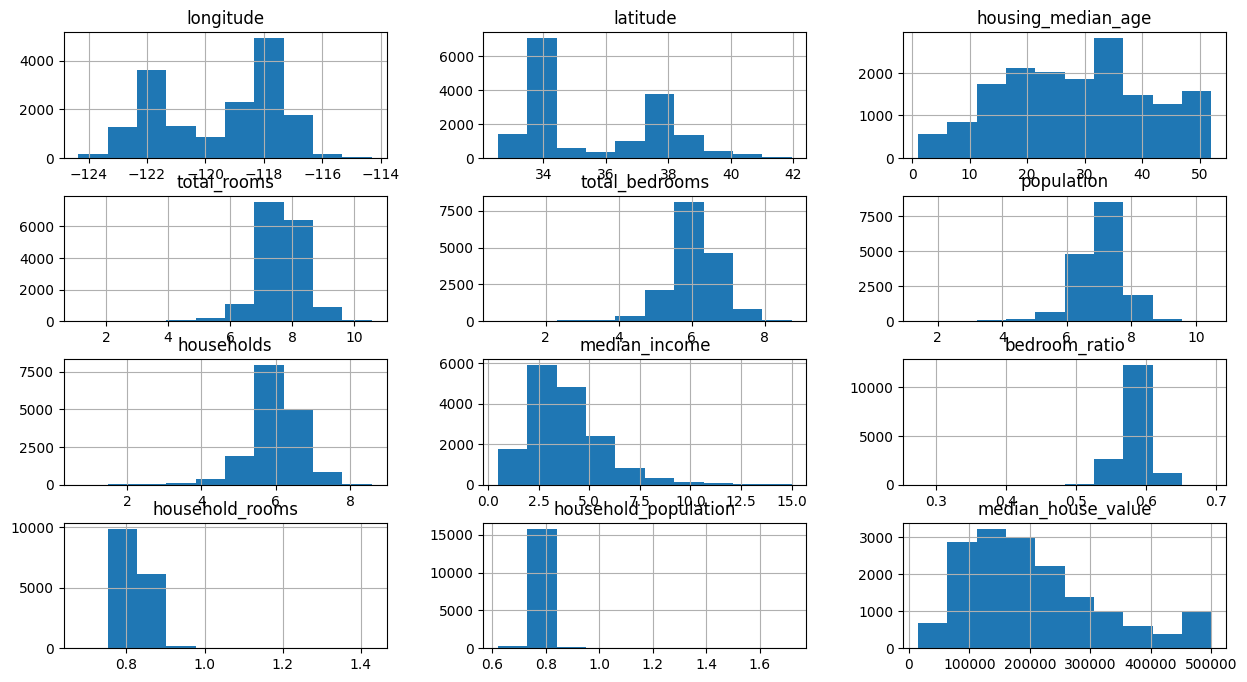

In [21]:
train_data.hist(figsize=[15,8])

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population,median_house_value
7665,-118.07,33.93,5.0,6.810142,5.236442,7.282074,5.068904,4.1250,True,False,False,False,False,0.570368,0.851651,0.890611,171900.0
9962,-122.23,38.33,31.0,8.143517,6.354370,7.338888,6.287859,5.5368,False,False,False,True,False,0.576781,0.830784,0.773414,325900.0
7372,-118.23,33.97,44.0,7.918992,6.573680,7.993958,6.556778,2.6951,True,False,False,False,False,0.604379,0.791977,0.797142,169300.0
6388,-118.03,34.16,36.0,7.245655,5.389072,6.504288,5.420535,7.1615,False,True,False,False,False,0.556047,0.848742,0.788428,484700.0
16141,-122.46,37.78,52.0,8.035603,6.590301,7.400621,6.496775,2.8553,False,False,False,True,False,0.598912,0.805073,0.760396,360700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,-122.21,37.82,52.0,7.773174,5.811141,6.701960,5.860786,7.0549,False,False,False,True,False,0.558237,0.844280,0.762452,331400.0
14047,-117.13,32.76,29.0,7.851272,6.526495,7.083388,6.466145,2.1094,False,False,False,False,True,0.605007,0.794897,0.739772,162500.0
14827,-117.09,32.66,37.0,7.117206,5.802118,6.991177,5.802118,1.6389,False,False,False,False,True,0.596209,0.800501,0.790698,114300.0
5012,-118.33,34.01,44.0,7.474772,6.139885,6.668228,6.100319,1.9231,True,False,False,False,False,0.599613,0.799896,0.738644,188500.0


In [23]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population,median_house_value
longitude,1.000000,-0.925285,-0.116195,0.036772,0.068103,0.117703,0.064256,-0.014464,0.323959,-0.054626,0.008156,-0.475320,0.043290,0.100398,-0.081055,0.080094,-0.046025
latitude,-0.925285,1.000000,0.019164,-0.039261,-0.075177,-0.143101,-0.094678,-0.080328,-0.447147,0.349368,-0.014369,0.358975,-0.159092,-0.115438,0.151560,-0.059151,-0.143516
housing_median_age,-0.116195,0.019164,1.000000,-0.309452,-0.269963,-0.240075,-0.239903,-0.111957,0.046717,-0.237624,0.007871,0.259114,0.015934,-0.037547,-0.035664,0.070766,0.108007
total_rooms,0.036772,-0.039261,-0.309452,1.000000,0.945908,0.865178,0.933298,0.205863,0.024896,-0.015221,-0.007451,-0.020222,0.003582,0.422985,-0.383257,-0.528409,0.157782
total_bedrooms,0.068103,-0.075177,-0.269963,0.945908,1.000000,0.898529,0.976245,-0.025239,0.046930,-0.047900,-0.001902,-0.022295,0.017918,0.682036,-0.576477,-0.557144,0.052468
population,0.117703,-0.143101,-0.240075,0.865178,0.898529,1.000000,0.930973,-0.005477,0.118195,-0.073461,-0.011231,-0.062720,-0.013450,0.582963,-0.633483,-0.232302,-0.023235
households,0.064256,-0.094678,-0.239903,0.933298,0.976245,0.930973,1.000000,0.004052,0.076831,-0.088646,-0.008319,-0.011153,0.019920,0.644295,-0.669121,-0.549663,0.072455
median_income,-0.014464,-0.080328,-0.111957,0.205863,-0.025239,-0.005477,0.004052,1.000000,0.164297,-0.235188,-0.008208,0.062029,0.024728,-0.504894,0.364792,-0.008438,0.690471
<1H OCEAN,0.323959,-0.447147,0.046717,0.024896,0.046930,0.118195,0.076831,0.164297,1.000000,-0.602813,-0.012005,-0.315278,-0.344359,0.081296,-0.141355,0.043506,0.251309
INLAND,-0.054626,0.349368,-0.237624,-0.015221,-0.047900,-0.073461,-0.088646,-0.235188,-0.602813,1.000000,-0.009218,-0.242081,-0.264411,-0.103536,0.188448,0.067501,-0.483050


<Axes: >

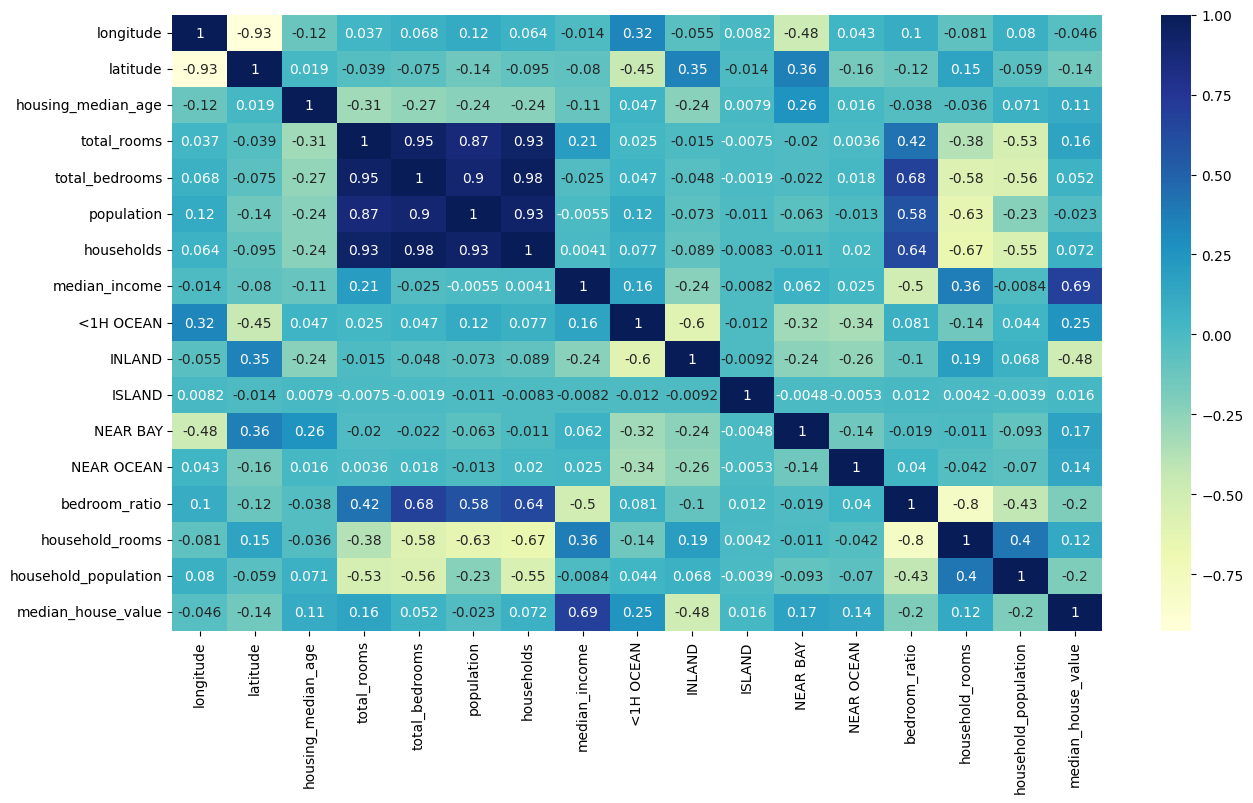

In [24]:
# Correlation
plt.figure(figsize=[15,8])
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

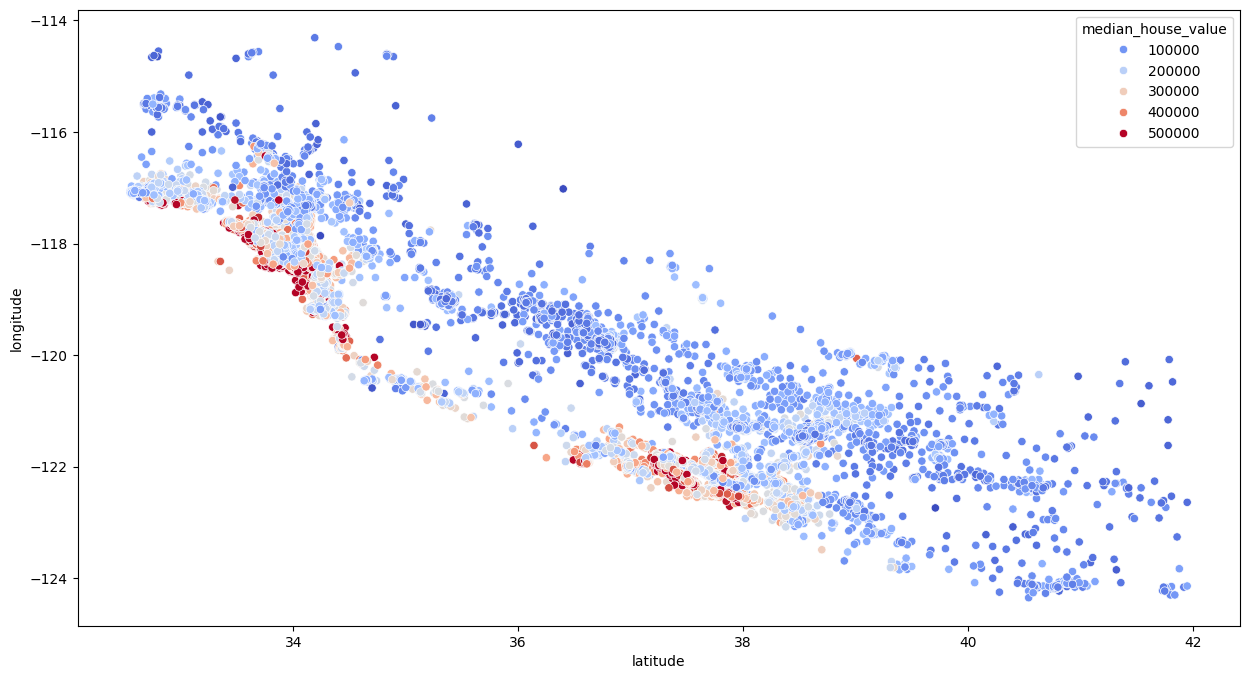

In [25]:
# California Visualization based on House Prices
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [26]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population
7665,-118.07,33.93,5.0,6.810142,5.236442,7.282074,5.068904,4.1250,True,False,False,False,False,0.570368,0.851651,0.890611
9962,-122.23,38.33,31.0,8.143517,6.354370,7.338888,6.287859,5.5368,False,False,False,True,False,0.576781,0.830784,0.773414
7372,-118.23,33.97,44.0,7.918992,6.573680,7.993958,6.556778,2.6951,True,False,False,False,False,0.604379,0.791977,0.797142
6388,-118.03,34.16,36.0,7.245655,5.389072,6.504288,5.420535,7.1615,False,True,False,False,False,0.556047,0.848742,0.788428
16141,-122.46,37.78,52.0,8.035603,6.590301,7.400621,6.496775,2.8553,False,False,False,True,False,0.598912,0.805073,0.760396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,-122.21,37.82,52.0,7.773174,5.811141,6.701960,5.860786,7.0549,False,False,False,True,False,0.558237,0.844280,0.762452
14047,-117.13,32.76,29.0,7.851272,6.526495,7.083388,6.466145,2.1094,False,False,False,False,True,0.605007,0.794897,0.739772
14827,-117.09,32.66,37.0,7.117206,5.802118,6.991177,5.802118,1.6389,False,False,False,False,True,0.596209,0.800501,0.790698
5012,-118.33,34.01,44.0,7.474772,6.139885,6.668228,6.100319,1.9231,True,False,False,False,False,0.599613,0.799896,0.738644


In [27]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,household_population
4745,-118.35,34.05,46.0,7.673223,6.113682,6.809039,6.095825,2.8841,True,False,False,False,False,0.585982,0.814819,0.750000
8850,-118.41,34.09,37.0,7.907284,5.713733,6.697034,5.676754,15.0001,True,False,False,False,False,0.543830,0.872516,0.779201
2201,-119.85,36.83,11.0,7.823246,6.059123,7.004882,6.006353,4.8036,False,True,False,False,False,0.573520,0.833993,0.772995
3353,-121.03,40.35,52.0,8.610137,6.951772,7.589842,6.626718,2.1833,False,True,False,False,False,0.591886,0.832608,0.763298
12453,-114.57,33.52,27.0,5.159055,3.583519,4.770685,3.555348,2.0833,False,True,False,False,False,0.527451,0.896524,0.850934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18780,-122.27,40.39,26.0,7.514255,6.047372,6.845880,6.013715,1.3571,False,True,False,False,False,0.590442,0.810717,0.760048
6200,-117.89,34.08,35.0,7.445418,5.817111,6.716595,5.877736,3.5000,True,False,False,False,False,0.577344,0.818332,0.762075
10379,-117.64,33.65,4.0,8.830982,7.321850,8.088562,7.272398,5.4132,True,False,False,False,False,0.603829,0.794943,0.747743
19737,-122.42,40.32,16.0,7.590347,5.929589,6.869014,5.811141,2.6827,False,True,False,False,False,0.577288,0.835589,0.780261


In [28]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [29]:
reg.fit(x_train,y_train)

LinearRegression()

In [30]:
reg.score(x_test,y_test)

0.6634185907666477

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
x_train_s=scaler.fit_transform(x_train)
reg.fit(x_train_s,y_train)

LinearRegression()

In [33]:
x_test_s=scaler.transform(x_test)

In [34]:
reg.score(x_test_s,y_test)

0.6634185907666477

In [44]:
#Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
forest.score(x_test,y_test)

0.8073695093956041

In [46]:
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [47]:
forest.score(x_test_s,y_test)

0.8078429744505007

In [58]:
# Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV
param_grid={
    #hyperparameters
    "n_estimators":[10,50,70],"min_samples_split":[2,4],"max_depth": [None,4,8]
}
grid_search=GridSearchCV(forest,param_grid, cv=5,scoring="neg_mean_squared_error",return_train_score=True)   # 5 fold cross-validation
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [10, 50, 70]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [61]:
best_forest=grid_search.best_estimator_

In [62]:
best_forest.score(x_test_s,y_test)

0.8042552550476049